In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import MultipleLocator

In [11]:
nmc_test  = ['a','e','f','s']
order_nmc = [0,1,2,3]



In [15]:
result=np.load('./npy/nmc_result_our.npy', allow_pickle=True)
realrul=np.load('./npy/nmc_real_our.npy', allow_pickle=True)

In [13]:
life = []
for i in range(4):
    life.append(len(realrul[i]))
print(life)

[965, 966, 967, 961]


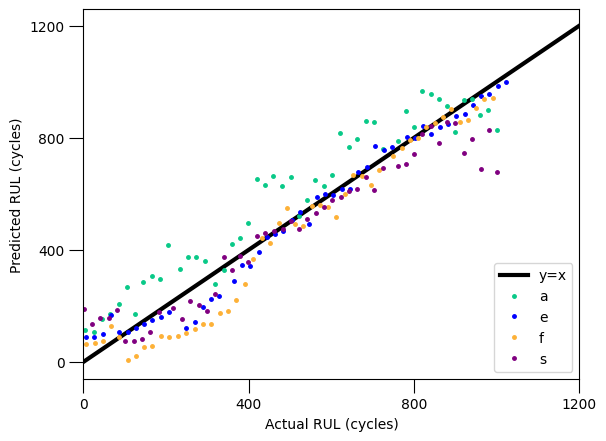

In [16]:
interval =5
x_lim = 1200
colors = ['#09C988','b','#FDB137','PURPLE','#40CEE3','red']
# plt.plot(result[1])
# plt.plot(realrul[1])
plt.style.use('default')
plt.plot(range(x_lim), range(x_lim),'-',c='black', linewidth=3,label='y=x')
color = 0
for i in order_nmc:
    plt.plot(realrul[i][::20]*3000, result[i][::20]*3000, '.',markersize=5,label=nmc_test[i], c=colors[i])
plt.legend(fontsize=10,loc="lower right")
x_major_locator=MultipleLocator(400)
y_major_locator=MultipleLocator(400)
ax=plt.gca()
ax.xaxis.set_major_locator(x_major_locator)
ax.yaxis.set_major_locator(y_major_locator)
plt.xlim((0,x_lim))
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.tick_params(length=10)
# plt.gca().set_facecolor('white')
plt.ylabel('Predicted RUL (cycles)',fontsize=10,family='Avenir')
plt.xlabel('Actual RUL (cycles)',fontsize=10,family='Avenir')
plt.savefig("./figure/NMC-rnn.png",dpi=1200,bbox_inches='tight')
plt.show()



findfont: Font family ['Avenir'] not found. Falling back to DejaVu Sans.


<Figure size 900x300 with 0 Axes>

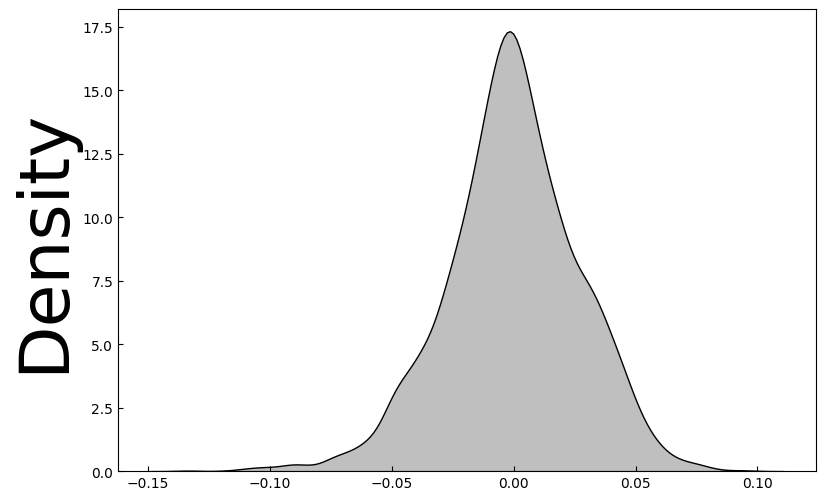

In [17]:
fig = plt.figure(figsize=(9,3))
cmap = plt.get_cmap('YlGnBu')
norm = plt.Normalize(vmin=0.3, vmax=1)
error_list = []

colors = ['k','mediumpurple','red','chocolate','limegreen','steelblue',]
label_names = ['#1', '#50','#65','#70', '#73', '#76' ]

for i in order_nmc:
    interval = 1
    rul_true = realrul[i]
    rul_pred = result[i]
    tmp = rul_pred[::interval] - rul_true[::interval]
    error_list.append(tmp.reshape(-1,1))
    
error_array = np.vstack(error_list)

fig = plt.figure(figsize=(9,6))
sns.kdeplot(error_array.squeeze(),shade=True,color='k')
# plt.xticks([-15, 0, 15],size=50)
# plt.yticks([],size=5)
# plt.xlim(-151,200)
# plt.rcParams['xtick.direction'] = 'in'
# plt.rcParams['ytick.direction'] = 'in'
# plt.tick_params(length=10)
plt.ylabel('Density',fontsize=50,family='Avenir')
plt.savefig("./figure/NMC-rnn-dens.png",dpi=1200,bbox_inches='tight')
plt.show()

In [18]:
import os
import time
import pickle
import math
import random
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator
import seaborn as sns
from scipy import interpolate
from datetime import datetime
import pandas as pd
from tool import EarlyStopping
from sklearn.metrics import roc_auc_score,mean_squared_error,mean_absolute_error, r2_score

import torch
import torch.nn.functional as F
import torch.optim as optim

from torch import nn
from torch.autograd import Variable
from torch.utils.data import DataLoader, Dataset, Sampler, TensorDataset
from torch.utils.data.sampler import RandomSampler
    
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

import warnings
warnings.filterwarnings('ignore')



import numpy as np

In [19]:
life = [1390, 1390, 1378, 545, 917, 736, 1390, 1024, 691, 1390, 867, 728, 736, 609, 1162, 971, 1268, 1034, 664, 924, 1390, 26, 213, 358, 439, 336, 363, 365, 380, 391, 373, 349, 387, 359, 397, 377, 413, 343, 377, 344, 335, 307, 591]

In [20]:
cols = ['rmse_after', 'r2_after', 'mae_after']

# 创建一个空的 DataFrame
table_wx = pd.DataFrame(index=range(4), columns=cols)

for i in range(4):
    # if i == 0:
    #     continue
    # if i == 1:
    #     continue
    # if i == 21:
    #     continue
    # if i == 42:
    #     continue
    rul_true = realrul[i]*3000
    rul_pred = result[i]*3000
    A_life = 2000
    
    rmse_after = np.sqrt(mean_squared_error(rul_true, rul_pred))
    r2_after = r2_score(rul_true, rul_pred)
    mae_after = mean_absolute_error(rul_true, rul_pred)/life[i]  * 100
    
    # 在 DataFrame 中保存结果
    table_wx.iloc[i] = [rmse_after, r2_after, mae_after]

# 计算每列的平均值
averages = table_wx.mean()

# 在 DataFrame 的最后一行添加平均值
table_wx.loc['Average'] = averages

# 显示结果
print(table_wx)


        rmse_after  r2_after mae_after
0          91.4709   0.90096   5.29858
1           63.362  0.954688   3.51691
2          83.8915  0.914643   4.75404
3          85.9229  0.912025   11.5763
Average    81.1618  0.920579   6.28646


In [19]:
import pandas as pd

# 假设 table_wx 是您的 DataFrame
table_wx.to_excel("nmc_rnn.xlsx", engine='openpyxl')
